In [1]:
from utils import *

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\spagn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\spagn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
file_path = 'https://raw.githubusercontent.com/ProfAI/natural-language-processing/main/datasets/Verifica%20Finale%20-%20Spam%20Detection/spam_dataset.csv'
df = load_dataset(file_path)

# Exploratory data analysis

In [3]:
display_basic_info(df)

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB
   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\nth...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\n( see a...   
2        3624   ham  Subject: neon retreat\nho ho ho , we ' re arou...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\nthis deal is to ...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  

Missing values:
Unnamed: 0    0
label        

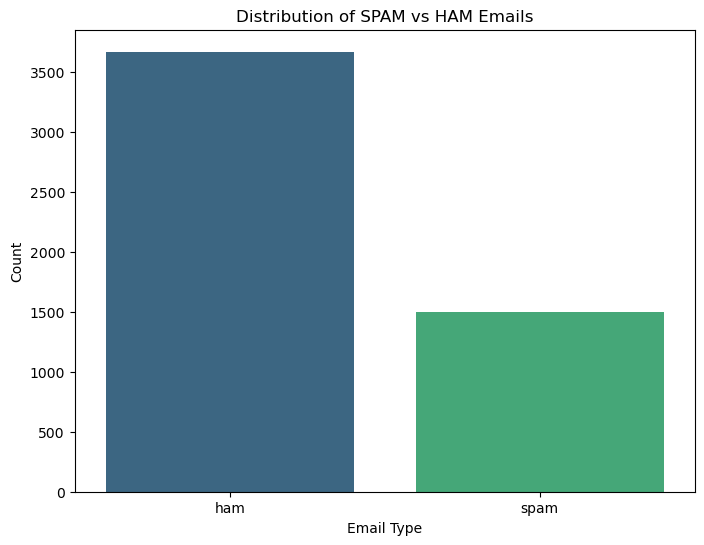

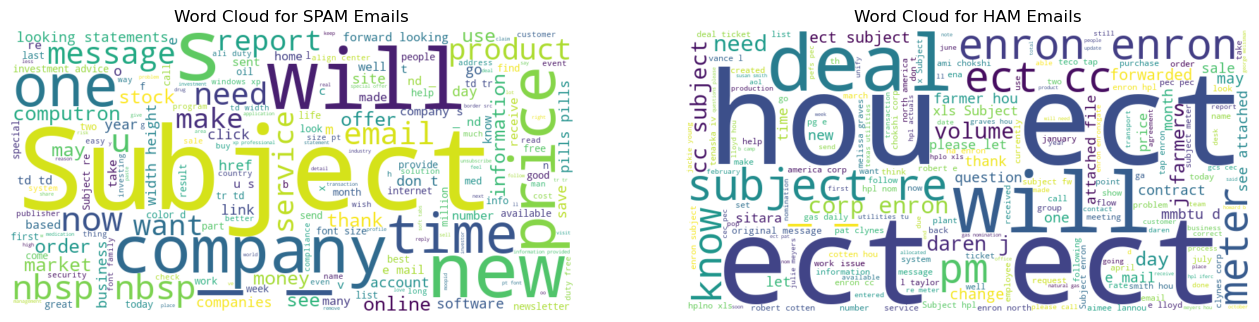

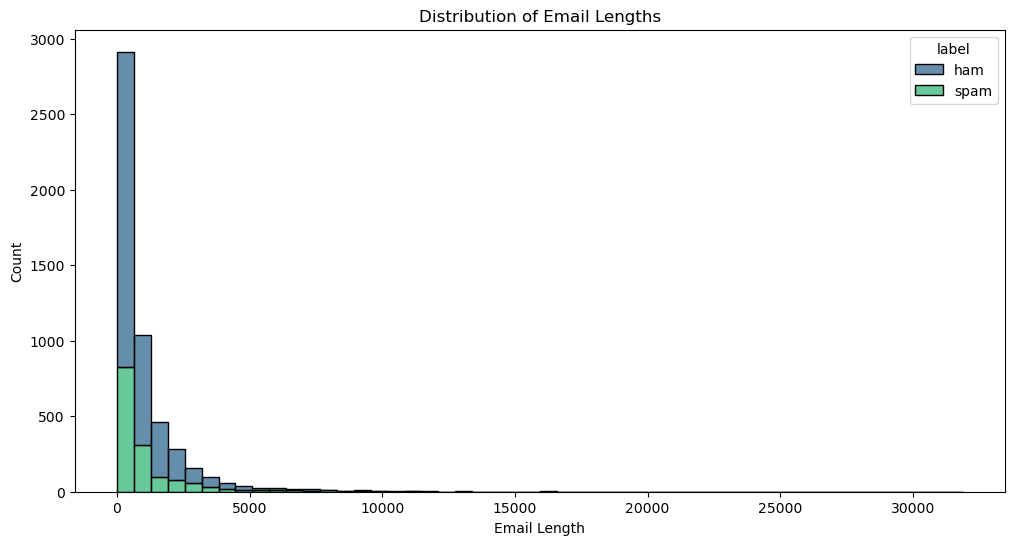

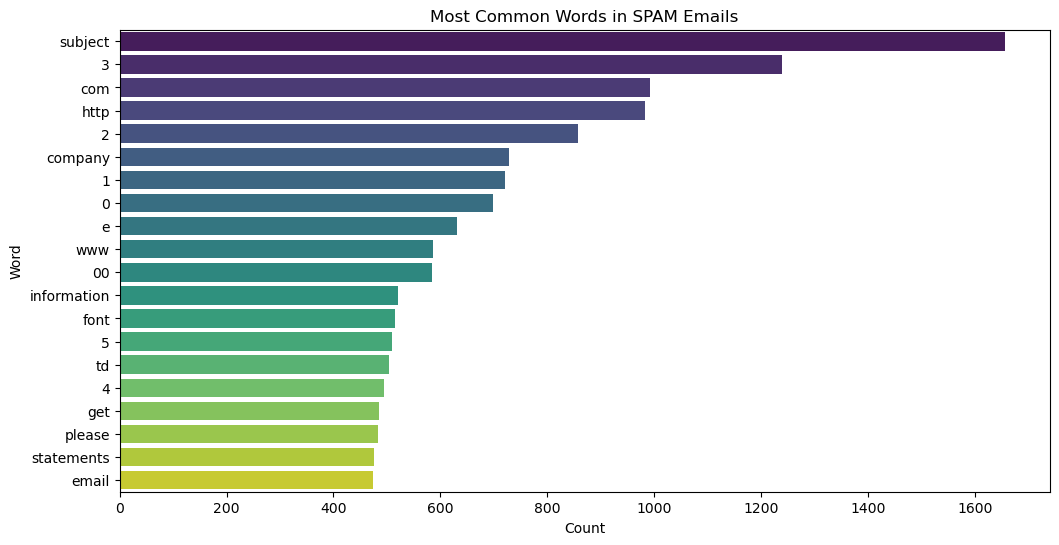

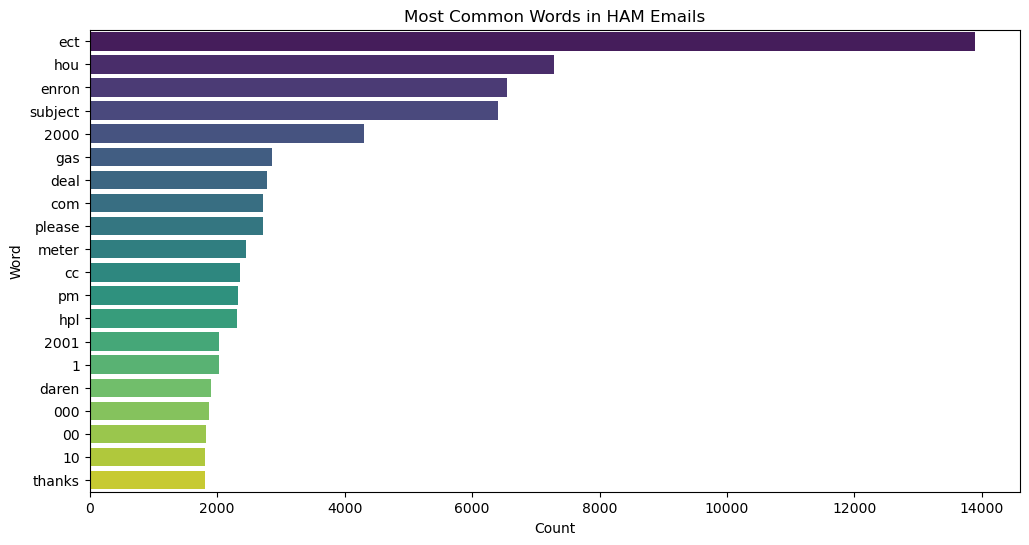

In [4]:
plot_label_distribution(df)
generate_wordclouds(df)
plot_email_length_distribution(df)
plot_common_words(df)

Most common words in SPAM emails

- Common words in SPAM emails include "com", "http", "company", "information", and "price". These words suggest that SPAM emails often contain URLs, company names, and commercial language.
- Numbers and symbols (e.g., "3", "2", "1", "0", "5", "4") are also frequent, which could be due to the inclusion of prices, phone numbers, or other numeric information.
- Technical and web-related terms like "http", "www", and "email" are prominent, indicating that many SPAM emails involve web links and online content.

Most common words in HAM emails

- Common words in HAM emails include "ect", "hou", "enron", "gas", "deal", and "subject". These words indicate that the dataset might be related to a specific business context, possibly the Enron email dataset, which contains a lot of business-related communication.
- The presence of terms like "please", "thanks", "deal", and "meter" suggests that HAM emails often include polite expressions and transactional language relevant to business operations.
- Numbers such as "2000", "2001", "10", "000" are also common, likely related to dates, quantities, and other numeric information used in business correspondence.

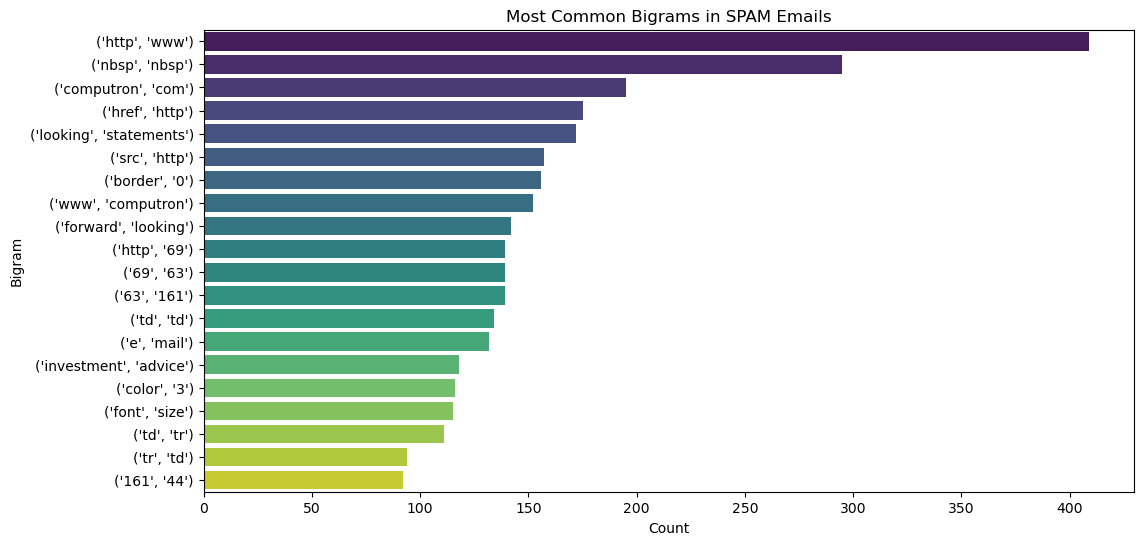

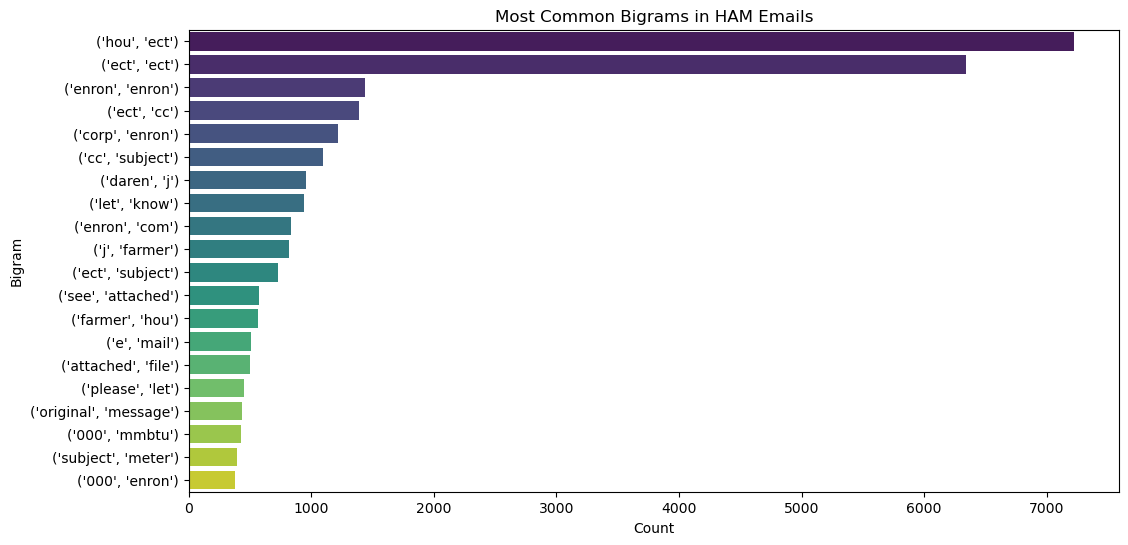

In [5]:
spam_bigrams_df, ham_bigrams_df = extract_bigrams(df)

plot_bigrams(spam_bigrams_df, 'Most Common Bigrams in SPAM Emails')
plot_bigrams(ham_bigrams_df, 'Most Common Bigrams in HAM Emails')

Most common bigrams in SPAM emails

- The most frequent bigram in SPAM emails is ('http', 'www'), which indicates the presence of web links in spam messages.
- Other common bigrams include ('nbsp', 'nbsp'), ('computron', 'com'), ('href', 'http'), and ('src', 'http'). These bigrams suggest the inclusion of HTML tags and entities commonly found in web content, further supporting the idea that SPAM emails often contain links and formatted content.
- Phrases like ('looking', 'statements'), ('forward', 'looking'), and ('investment', 'advice') indicate the presence of financial terms and promotional content.

Most common bigrams in HAM emails

- The most frequent bigram in HAM emails is ('hou', 'ect'), followed by ('ect', 'ect') and ('enron', 'enron'). This suggests a strong contextual link to the Enron email dataset.
- Other common bigrams include ('enron', 'enron'), ('ect', 'cc'), and ('cc', 'subject'), which are likely related to business communication practices within the company.
- Bigrams like ('daren', 'jj'), ('let', 'know'), and ('see', 'attached') indicate typical email conversation patterns, including instructions and references to attachments.
- Phrases such as ('please', 'let'), ('original', 'message'), and ('attached', 'file') show polite requests and references to email threading and attachments, which are common in professional communication.

# Training of a classifier to identify SPAM

In [6]:
df = apply_text_preprocessing(df)

X = df['cleaned_text']
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters found:
{'rf__n_estimators': 100, 'rf__min_samples_split': 10, 'rf__min_samples_leaf': 1, 'rf__max_features': 'sqrt', 'rf__max_depth': None}
Classification Report:
              precision    recall  f1-score      support
0              0.994429  0.971429  0.982794   735.000000
1              0.933754  0.986667  0.959481   300.000000
accuracy       0.975845  0.975845  0.975845     0.975845
macro avg      0.964091  0.979048  0.971138  1035.000000
weighted avg   0.976842  0.975845  0.976037  1035.000000


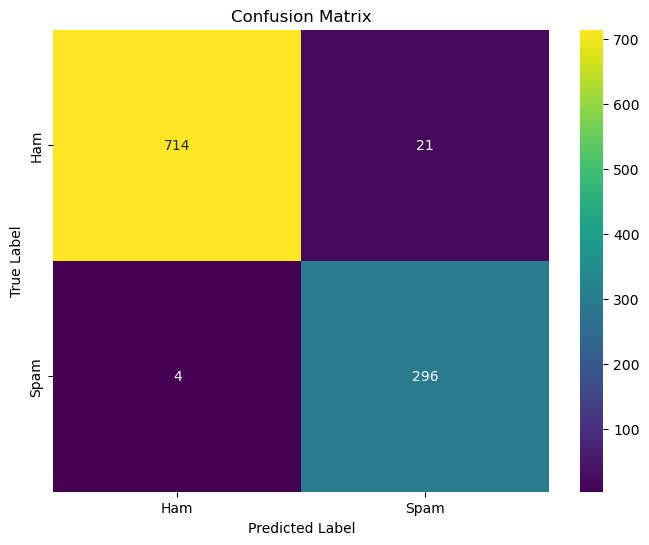

In [7]:
# Train and evaluate the Random Forest classifier
random_forest_model = train_random_forest(X_train, y_train)
classification_rep_rf, conf_matrix_rf = evaluate_model(random_forest_model, X_test, y_test)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters found:
{'svm__kernel': 'linear', 'svm__gamma': 0.1, 'svm__C': 100}
Classification Report:
              precision    recall  f1-score      support
0              0.975443  0.972789  0.974114   735.000000
1              0.933775  0.940000  0.936877   300.000000
accuracy       0.963285  0.963285  0.963285     0.963285
macro avg      0.954609  0.956395  0.955496  1035.000000
weighted avg   0.963366  0.963285  0.963321  1035.000000


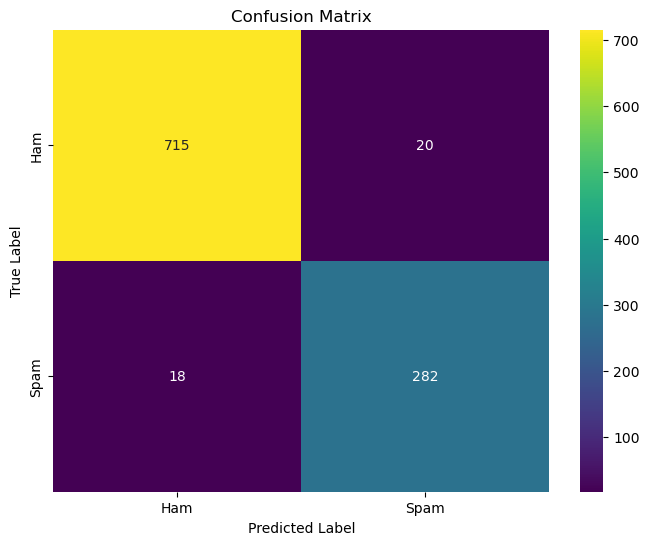

In [8]:
# Train and evaluate the SVM classifier
svm_model = train_svm(X_train, y_train)
classification_rep_svm, conf_matrix_svm = evaluate_model(svm_model, X_test, y_test)

In [9]:
# Save the classification reports as a dictionary
classification_report_dict = {
    'Random Forest': classification_rep_rf,
    'SVM': classification_rep_svm
}
combined_report_df, accuracy_df = create_combined_classification_report(classification_report_dict)

# Display the combined DataFrames
display(combined_report_df)
display(accuracy_df)

,Metric,precision_Random Forest,precision_SVM,recall_Random Forest,recall_SVM,f1-score_Random Forest,f1-score_SVM
0,0,0.994429,0.975443,0.971429,0.972789,0.982794,0.974114
1,1,0.933754,0.933775,0.986667,0.940000,0.959481,0.936877


,Model,Accuracy
0,Random Forest,0.975845
1,SVM,0.963285


- Random Forest: Overall, the Random Forest model outperforms the SVM model in terms of precision, recall, and F1-score for both Ham and Spam emails. Its higher accuracy suggests it is better suited for this email classification task.
- SVM: The SVM model, while still effective, does not perform as well as the Random Forest model across most metrics. It might require further tuning or alternative kernel functions to improve its performance.

# Identification of main Topics among the SPAM mails in the dataset

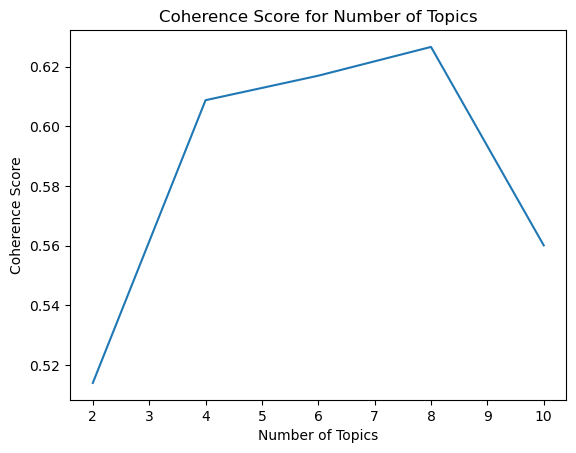

In [10]:
# Preprocess the text and filter for SPAM emails
df['preprocessed_spam_text'] = df['text'].apply(preprocess_spam_text)
spam_df = df[df['label'] == 'spam']

# Create a dictionary and corpus for LDA
dictionary = corpora.Dictionary(spam_df['preprocessed_spam_text'])
corpus = [dictionary.doc2bow(text) for text in spam_df['preprocessed_spam_text']]

# Compute coherence values for different numbers of topics
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=spam_df['preprocessed_spam_text'], start=2, limit=12, step=2)

# Plot coherence values
plot_coherence_values(coherence_values, start=2, step=2, limit=12)

In [11]:
# Determine the optimal number of topics
optimal_num_topics = find_optimal_number_of_topics(coherence_values, start=2, step=2)
print("Optimal number of topics:", optimal_num_topics)

Optimal number of topics: 8


# Calculation of semantic distance between topics obtained

In [12]:
# Train the final LDA model with the optimal number of topics
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=optimal_num_topics, id2word=dictionary, passes=15, random_state=42)

# Visualize the topics and display them in the notebook
vis_data = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)

In [13]:
# Print the topics and their top words
print("Topics and their top words:")
topics = lda_model.print_topics(num_words=5)
for i, topic in enumerate(topics, start=1):
    print(f"Topic {i}: {topic[1]}")

Topics and their top words:
Topic 1: 0.002*"citibank" + 0.002*"weight" + 0.002*"fat" + 0.002*"girl" + 0.002*"lose"
Topic 2: 0.018*"company" + 0.011*"statement" + 0.009*"stock" + 0.007*"security" + 0.007*"information"
Topic 3: 0.008*"http" + 0.008*"pill" + 0.007*"com" + 0.007*"price" + 0.006*"get"
Topic 4: 0.025*"font" + 0.020*"http" + 0.020*"nbsp" + 0.018*"height" + 0.015*"width"
Topic 5: 0.005*"said" + 0.003*"back" + 0.003*"penis" + 0.003*"get" + 0.002*"one"
Topic 6: 0.002*"dosage" + 0.001*"thought" + 0.001*"without" + 0.001*"case" + 0.001*"stock"
Topic 7: 0.013*"com" + 0.009*"computron" + 0.009*"www" + 0.008*"contact" + 0.007*"please"
Topic 8: 0.004*"microsoft" + 0.004*"price" + 0.004*"pro" + 0.003*"http" + 0.003*"cd"


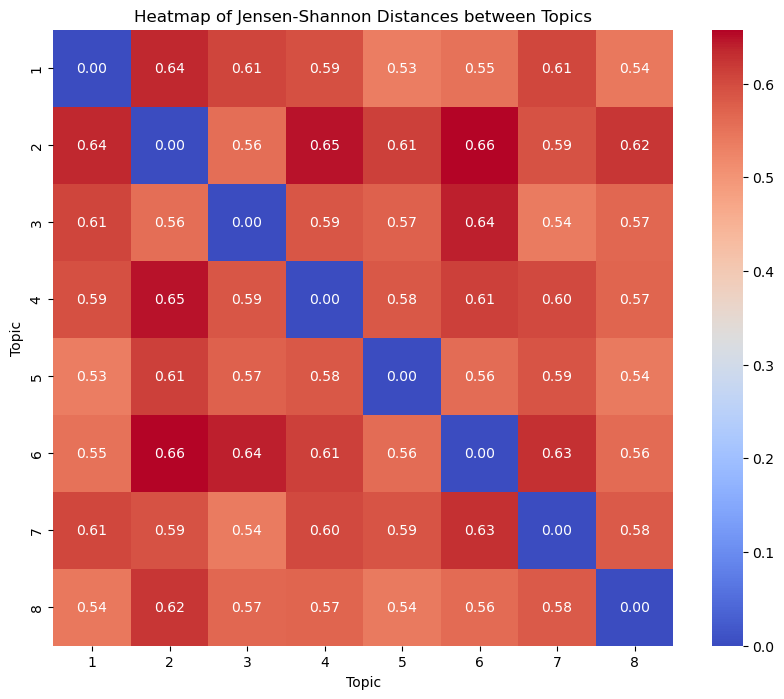

In [14]:
# Extract topic distributions
topic_distributions = get_topic_distributions(lda_model, optimal_num_topics, dictionary)

# Calculate Jensen-Shannon distances
js_distances = calculate_js_distances(topic_distributions, optimal_num_topics)

# Plot Jensen-Shannon distance heatmap
plot_js_distances(js_distances, optimal_num_topics)

The discrepancy between the results displayed with pyLDAvis and the distance calculations between topics using Jensen-Shannon (JS) distance primarily stems from the distinct nature of the two approaches. pyLDAvis employs dimensionality reduction techniques to project topics into a reduced visual space, facilitating human interpretation but potentially introducing distortions. On the other hand, the Jensen-Shannon divergence measures the similarity between the probability distributions of topics directly in the original dimension space of the model, providing a precise quantitative assessment but not one that is immediately visually interpretable. These fundamental methodological differences lead to varying perceptions of the distance or similarity between topics.

# Extraction of organisations from NON SPAM mails

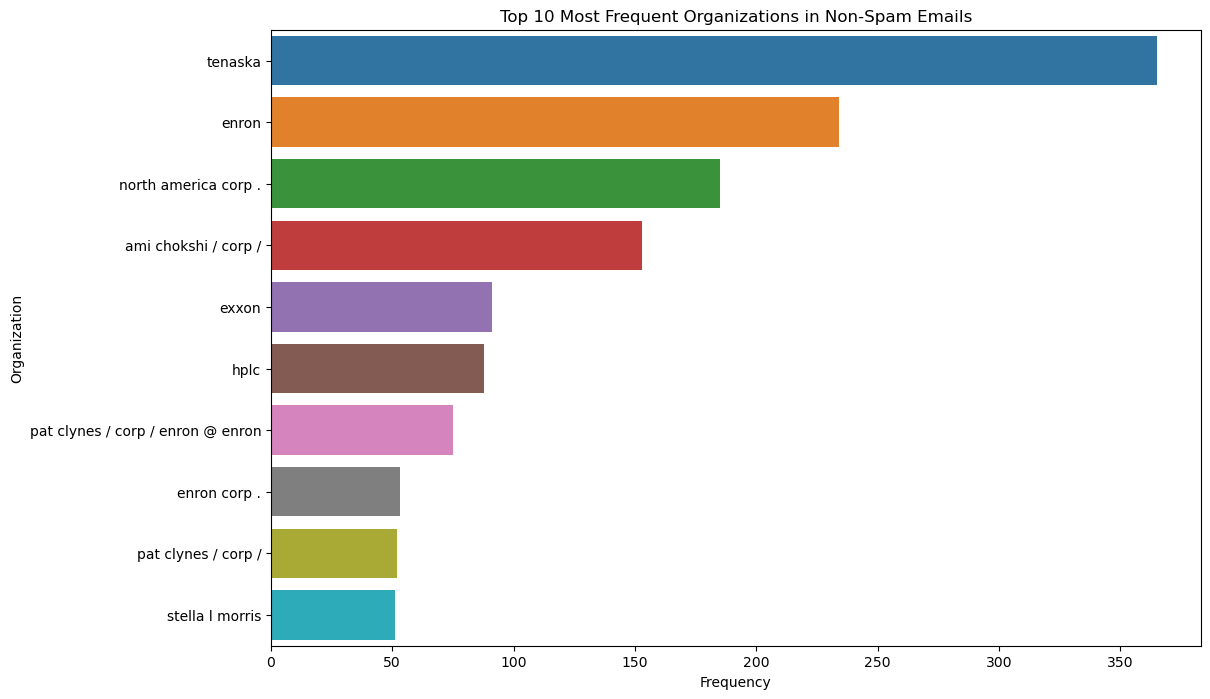

In [15]:
# Extract organizations from non-spam emails and count their occurrences
org_df = get_organizations_from_non_spam(df)

# Plot the top 10 most frequent organizations
plot_top_organizations(org_df, top_n=10)